# Task 1

Here I am reviewing the mathematical formulation provided by the organizer, focusing on binary decision variables, linear constraints, and the quadratic objective. Since the repo wasn't released at the time this notebook was worked on, I use some made up values as placeholder for each variable and used them to perform a rudimentary brute-force optimization routine.

The optimization target is to make each bucket's aggregated characterisc match the desired target matrix target[L,J]

In [ ]:
import numpy as np
# n bonds, J characteristics, L buckets

# below are the placeholder values for testing purposes.

n = 35 # number of bonds. "A set of securities C".
L = 5 # number of risk buskets. 
J = 4 # number of characteristics. "A set of J of characteristics"


price = np.random.rand(n) # p_c price of each bond
delta = np.random.rand(n) # delta_c in the x_c formula
beta = np.random.randn(n, J) # beta_cj characteristics of each bond
bucket_of = np.random.randint(0, L, n) # l(c) which bucket each bond belongs to
target = np.random.randn(L, J)/10 # K_lj (desired target)
K_min = np.zeros((L, J)) # Floors
N_max = 10 # max number of bonds in portfolio
m_c, M_c = 0.0, 1_000_000 # m_c, M_c


In [ ]:
def evaluate(bits: np.array): # given a binary vector

    x_c = delta * bits # 

    bucket_char = np.zeros((L, J))
    for c in range(n):
        if bits[c]:
            bucket_char[bucket_of[c]] += beta[c] # binary variable constraint
    
    obj = np.sum((bucket_char-target)**2) # objective function

    card_violation = bits.sum() - N_max #max number of bonds in basket sum(y_c) <= N

    cash_used = np.sum(price * x_c) # residual cash flow
    rc_low = m_c - cash_used # min value of each characteristics j
    rc_high = cash_used - M_c # max value of each characteristics j

    floor_violation = (K_min - bucket_char).clip(min=0) # binary variable constraints.

    violations = np.concatenate([[card_violation, rc_low, rc_high], floor_violation.flatten()]) # combine all constraint violations

    return obj, violations, bucket_char


In [ ]:
from itertools import islice
# brute-force five random bit-vectors; print objective + violated rules
for bits in islice((np.random.randint(0, 2, n) for _ in range(5)), 5): # brute force 5 random 35-bit binary vectors
    obj, v, bucket_char = evaluate(bits)
    print(f"obj={obj:9.2f}   max_violation={v.max():7.1f}")


obj=    23.77   max_violation=    5.0
obj=    42.33   max_violation=   12.0
obj=    49.10   max_violation=   10.0
obj=    56.52   max_violation=    6.0
obj=   139.05   max_violation=   12.0


Text(50.722222222222214, 0.5, 'Buckets')

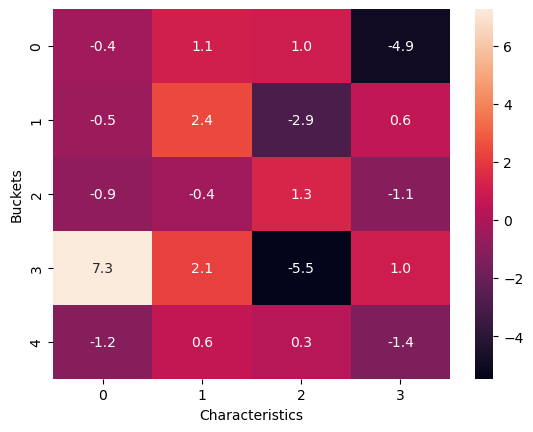

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(bucket_char, annot=True, fmt=".1f")
plt.xlabel('Characteristics')
plt.ylabel('Buckets')

This heatmap shows the aggregated characteristics of the selected bonds, grouped by their assigned buckets. Each row represents one of the five buckets, and each column corresponds to one of the four characteristics. The values in each cell indicate the total contribution of that characteristic from all bonds in that bucket, with positive values shown in lighter red and negative values in darker purple/black.

Bucket 3 has a strong positive value for Characteristic 0 (7.3) and a strong negative value for Characteristic 2 (−5.5), indicating large deviations in those dimensions.
Other buckets show smaller, more balanced characteristic sums, with some moderate deviations, Bucket 1, Characteristic 1 at 2.4 for example.